<a href="https://www.lnls.cnpem.br/"><img src="https://www.lnls.cnpem.br/wp-content/uploads/2019/01/LNLS-Assinatura.svg" style="width:200px; text-align:left;"></a>

## Magnet Inductance Step Test Fast Corrector - FC-001 - CH Coil

>  - Magnet under test: Fast Corrector - FC-001 - CH Coil;

> - Power Supply: CAENels FAST-PS 1020;


> - Goal: Test performed to measure the possible inductance variation as a function of the applied current.

> Procedure: The input current in the coils is varied in continuous steps from 1 A amplitude to a maximum of 6 A (maximum PID adjustment).
With the oscilloscope, we measure the variation of current and voltage in the coils, calculate the resistance and through the relationship between voltage and current over time, it is possible to determine the time constant of the RL loop and thus calculate the inductance of the coil.

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from sympy import *
import scipy
init_printing(True)
%matplotlib inline

In [2]:
#Modifying the plot style
style.use('seaborn')

In [3]:
# Defining Variables
E, DeltaI, DeltaT, DeltaV, L = symbols('epsilon Delta_I Delta_t Delta_V L')
Lt, V_t, R_0, I_t, t, V, tau = symbols('L(t) V(t) R_0 I(t) t V tau')
I, Ee, R, e, I_tau = symbols('I E R e I_tau')

### Definitions

In [56]:
#_induct = Eq(L,-E*(DeltaT/DeltaI))
_induct = Eq(L,R_0*tau)
_induct_time = Eq(Lt,-1*(V_t - R_0*I_t)*(DeltaT/DeltaI))
_R0 = Eq(R_0, DeltaV/DeltaI)

#Deduction
_circuit_RL = Eq(I,(Ee/R_0)-(Ee/R_0)*e**((-R_0/L)*t))

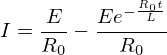

In [5]:
_circuit_RL

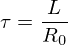

In [6]:
_time_const = Eq(tau, L/R_0)
_time_const

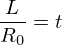

In [7]:
_time_tau = Eq(_time_const.rhs,t)
_time_tau

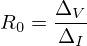

In [8]:
_R0

In [57]:
_induct

### Using Time Constants for RL Circuits

In [10]:
_I_tau = Eq(I_tau, (Ee/R_0)-(Ee/R_0)*e**((-R_0/L)*_time_tau.lhs))#.simplify()

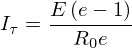

In [11]:
_I_tau_sim = simplify(_I_tau)
_I_tau_sim

In [12]:
neper = Eq(e,np.exp(1))
neper

In [13]:
_I_tau =  Eq(I_tau, (_circuit_RL.lhs)-(_circuit_RL.lhs)*neper.rhs**((-R_0/L)*_time_tau.lhs)).simplify()
_I_tau

In [14]:
# from IPython.display import Image
# Image(filename='Magnet_Inductance_Test_image.png')

## Step test 0 to 1A

In [15]:
#Import current steps data files
_step_01 = pd.read_csv('fc_01_ch_01.csv', sep=',', header=1)
_step_02 = pd.read_csv('fc_01_ch_02.csv', sep=',', header=1)
_step_03 = pd.read_csv('fc_01_ch_03.csv', sep=',', header=1)
_step_04 = pd.read_csv('fc_01_ch_04.csv', sep=',', header=1)
_step_05 = pd.read_csv('fc_01_ch_05.csv', sep=',', header=1)
_step_06 = pd.read_csv('fc_01_ch_06.csv', sep=',', header=1)
_step_07 = pd.read_csv('fc_01_ch_07.csv', sep=',', header=1)
_step_08 = pd.read_csv('fc_01_ch_08.csv', sep=',', header=1)
_step_09 = pd.read_csv('fc_01_ch_09.csv', sep=',', header=1)
_step_10 = pd.read_csv('fc_01_ch_10.csv', sep=',', header=1)

In [16]:
#Creating dictionary with steps
_dict = {'step01': _step_01,
         'step02': _step_02,
         'step03': _step_03,
         'step04': _step_04,
         'step05': _step_05,
         'step06': _step_06,
         'step07': _step_07,
         'step08': _step_08,
         'step09': _step_09,
         'step10': _step_10
        }

In [17]:
#Manipulating data for build list of arrays
_volts_array = []
_current_array = []
_resistance_array = []
for item in _dict:
    _volts_array.append(_dict[str(item)].Volt)
    _current_array.append(_dict[str(item)].Ampere)
    _resistance_array.append(_dict[str(item)].Volt/_dict[str(item)].Ampere)

#Convert list to numpy array
_volts_array = np.asarray(_volts_array)
_current_array = np.asarray(_current_array)
_resistance_array = np.asarray(_resistance_array)

#Transposed arrays
_volts_array = _volts_array.T
_current_array = _current_array.T
_resistance_array = _resistance_array.T

In [18]:
#Creating DF for volts
_DF_for_volts = pd.DataFrame(_volts_array,
                             index=_step_01.second,
                             columns=['Step01_volts(v)', 'Step02_volts(v)', 'Step03_volts(v)',
                                      'Step04_volts(v)', 'Step05_volts(v)', 'Step06_volts(v)',
                                      'Step07_volts(v)', 'Step08_volts(v)', 'Step09_volts(v)',
                                      'Step10_volts(v)'])
#Creating DF for ampere
_DF_for_amp = pd.DataFrame(_current_array,
                           index=_step_01.second,
                           columns=['Step01_amp(A)', 'Step02_amp(A)', 'Step03_amp(A)',
                                    'Step04_amp(A)', 'Step05_amp(A)', 'Step06_amp(A)',
                                    'Step07_amp(A)', 'Step08_amp(A)', 'Step09_amp(A)',
                                    'Step10_amp(A)'])
#Creating DF for resistance
_DF_for_resis = pd.DataFrame(_resistance_array,
                             index=_step_01.second,
                             columns=['Step01_R(ohm)', 'Step02_R(ohm)', 'Step03_R(ohm)',
                                      'Step04_R(ohm)', 'Step05_R(ohm)', 'Step06_R(ohm)',
                                      'Step07_R(ohm)', 'Step08_R(ohm)', 'Step09_R(ohm)',
                                      'Step10_R(ohm)'])

### Summarizing  Input Data Frames

In [19]:
_DF_for_volts.head()

Step01_volts(v)  Step02_volts(v)  Step03_volts(v)  Step04_volts(v)  \
second                                                                          
-0.002500        -0.286825        -0.235019        -0.250408        -0.144566   
-0.002498        -0.273477        -0.235333        -0.164981        -0.305370   
-0.002495        -0.311950        -0.220257        -0.265483        -0.180056   
-0.002492        -0.348854        -0.129805        -0.180056        -0.225282   
-0.002490        -0.249136        -0.290609        -0.210207        -0.320446   

           Step05_volts(v)  Step06_volts(v)  Step07_volts(v)  Step08_volts(v)  \
second                                                                          
-0.002500        -0.210207        -0.164667        -0.286825        -0.260914   
-0.002498        -0.199843        -0.300345        -0.198885        -0.298603   
-0.002495        -0.255119        -0.200157        -0.261699        -0.311165   
-0.002492        -0.119755        -0.230308        -0.336291        -0.298603   
-0.002490        -0.275220        -0.209893        -0.236574        -0.236574   

           Step09_volts(v)  Step10_volts(v)  
second                                       
-0.002500        -0.059909        -0.337076  
-0.002498        -0.236574        -0.286040  
-0.002495        -0.273477        -0.274262  
-0.002492        -0.286040        -0.261699  
-0.002490        -0.299388        -0.274262

In [20]:
_DF_for_amp.head()

Step01_amp(A)  Step02_amp(A)  Step03_amp(A)  Step04_amp(A)  \
second                                                                  
-0.002500      -0.004257      -0.005019      -0.005137      -0.004259   
-0.002498      -0.004132      -0.004257      -0.004760      -0.003992   
-0.002495      -0.003888      -0.004140      -0.004265      -0.003741   
-0.002492      -0.004760      -0.003888      -0.005388      -0.003003   
-0.002490      -0.004760      -0.003888      -0.004886      -0.003505   

           Step05_amp(A)  Step06_amp(A)  Step07_amp(A)  Step08_amp(A)  \
second                                                                  
-0.002500      -0.002485      -0.002736      -0.008487      -0.008989   
-0.002498      -0.003741      -0.003741      -0.008989      -0.008989   
-0.002495      -0.003238      -0.003741      -0.007011      -0.008989   
-0.002492      -0.002500      -0.003992      -0.008518      -0.009523   
-0.002490      -0.003003      -0.003490      -0.008518      -0.008989   

           Step09_amp(A)  Step10_amp(A)  
second                                   
-0.002500      -0.009492      -0.009523  
-0.002498      -0.008016      -0.009492  
-0.002495      -0.009994      -0.008016  
-0.002492      -0.009994      -0.009994  
-0.002490      -0.009492      -0.009523

In [21]:
_DF_for_resis.head()

Step01_R(ohm)  Step02_R(ohm)  Step03_R(ohm)  Step04_R(ohm)  \
second                                                                  
-0.002500      67.371263      46.825798      48.748112      33.942921   
-0.002498      66.189131      55.276443      34.660654      76.492876   
-0.002495      80.227082      53.207370      62.243648      48.132000   
-0.002492      73.290299      33.383112      33.417831      75.023614   
-0.002490      52.340794      74.738511      43.026560      91.416654   

           Step05_R(ohm)  Step06_R(ohm)  Step07_R(ohm)  Step08_R(ohm)  \
second                                                                  
-0.002500      84.603837      60.188325      33.796606      29.024933   
-0.002498      53.421239      80.287210      22.124636      33.217518   
-0.002495      78.780045      53.505195      37.328737      34.615047   
-0.002492      47.896027      57.690230      39.479100      31.355181   
-0.002490      91.653710      60.147643      27.772716      26.317221   

           Step09_R(ohm)  Step10_R(ohm)  
second                                   
-0.002500       6.311649      35.395158  
-0.002498      29.513821      30.135389  
-0.002495      27.363194      34.215655  
-0.002492      28.620188      26.184763  
-0.002490      31.541652      28.799277

### Plotting all Data Frames

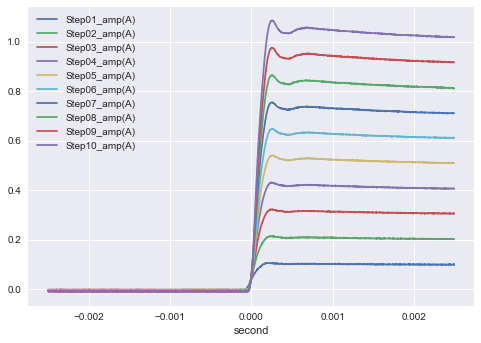

In [22]:
_DF_for_amp.plot()

In [23]:
#Slice DF to search rise time range
#a = _DF_for_amp[-0.08:0.4175]
a = _DF_for_amp[-0.001:0.001]
v = _DF_for_volts[-0.001:0.001]
r = _DF_for_resis[-0.001:0.001]
#Plotting
# cx = a.plot(y='Step01_amp(A)')
# v.plot(ax=cx, y='Step01_volts(v)')
# r.plot(ax=cx, y='Step01_R(ohm)')

In [24]:
#Fitting curve for Current
_x_axis = a.index
poly = np.polyfit(_x_axis,a['Step01_amp(A)'],25)
ploy1d = np.poly1d(poly)
#print(ploy1d)

In [25]:
#Poly fit vector
poly_fit_graph = []
for i in a.index:
    num = ploy1d(i)
    poly_fit_graph.append(float(num))

### Viewing the first step 

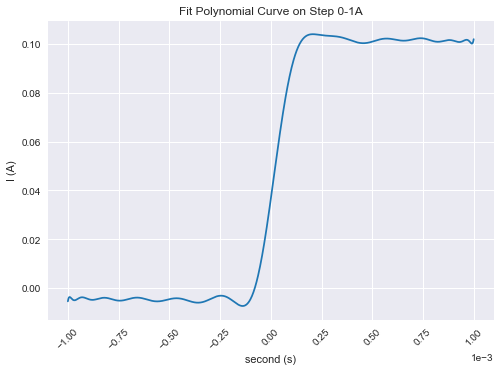

In [26]:
#Plotting polynimial curve on step 0-1A

color = 'tab:blue'
plt.plot(_x_axis,poly_fit_graph, color=color)
plt.xlabel('second (s)')
plt.ylabel('I (A)')
plt.title('Fit Polynomial Curve on Step 0-1A')
plt.xticks(rotation='45')
plt.ticklabel_format(style='sci', axis='x', scilimits=(-1e-3,1e-3))
plt.grid('on')#, alpha=0.3)

In [27]:
#Derivative curve
_deriv = ploy1d.deriv()  #dI/dt

In [28]:
#Derived curve points vector
calc = np.array([])
for i in a.index:
    calc = np.append(calc, _deriv(i))

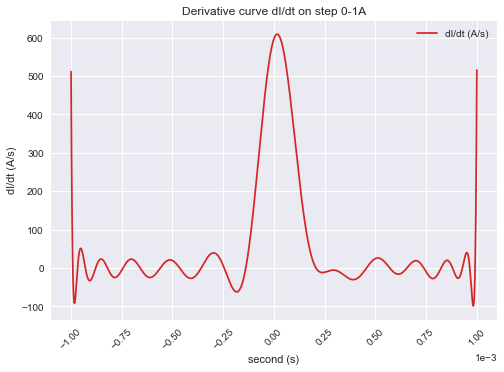

In [29]:
#Plotting dI/dt curve on step 0-1A

color = 'tab:red'
plt.plot(_x_axis, calc, color=color, label='dI/dt (A/s)')
plt.xlabel('second (s)')
plt.ylabel('dI/dt (A/s)')
plt.title('Derivative curve dI/dt on step 0-1A')
plt.legend(loc='best')
plt.xticks(rotation='45')
plt.ticklabel_format(style='sci', axis='x', scilimits=(-1e-3,1e-3))
plt.grid('on')#, alpha=0.3)

In [30]:
# #plt.plot(_x_axis, a['Step01_amp(A)'].values, 'b-', label='I(A)')
# plt.plot(_x_axis, poly_fit_graph, 'b-', label='I (A)')
# plt.plot(_x_axis, calc, 'r--', label='dI/dt (A/s)')
# plt.xlabel('second (s)')
# plt.ylabel('I (A)')
# plt.title('dI/dt(A/s) versus I(A) at Step 0-1A')
# plt.legend(loc='best')

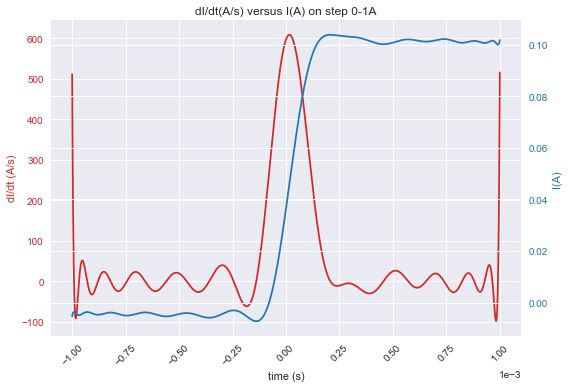

In [31]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('dI/dt (A/s)', color=color)
ax1.plot(_x_axis, calc, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=45)
ax1.ticklabel_format(axis='x', style='sci', scilimits=(-1e-3,1e-3))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('I(A)', color=color)  # we already handled the x-label with ax1
ax2.plot(_x_axis, poly_fit_graph, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid('on')#, alpha=0.3)

plt.title('dI/dt(A/s) versus I(A) on step 0-1A')
fig.tight_layout()  # otherwise the right y-label is slightly clipped

-------------------------------------------

## Calculating inductance versus current for all steps

In [32]:
def poly_fit_func(df, n): #_DF_for_amp ou a
    '''Find the polynomial fit for each current step'''
    _poly_array = []
    _deriv_array = []
    _x_axis = df.index
    for item in df.columns:
        #Fitting polynomial
        poly = np.polyfit(_x_axis,df[item],n)
        ploy1d = np.poly1d(poly)
        _poly_array.append(ploy1d)
        
        #Derivative curve
        _deriv = ploy1d.deriv()  #dI/dt
        _deriv_array.append(_deriv)
    return _deriv_array
    
def final_devs(df, der_arr):
    '''List with the derivatives of the polynomial fit curves'''
    _x_axis = df.index
    f = []
    for i in der_arr:
        final = np.array([])
        for j in _x_axis:
            final = np.append(final, i(j))
        f.append(final)
    return f

In [33]:
d_arrays = poly_fit_func(a,25)

In [34]:
_derive_datas = final_devs(a,d_arrays)

In [35]:
'''Another method more simple to get derivative data'''
def derivative_form(df):
    '''Numerical method for obtaining the derivative from raw data'''
    _x_axis = df.index
    _f_array = []
    _derivative_final_list = []
    for item in df.columns:
        _f_ = np.diff(df[item])/np.diff(_x_axis)
        _f_array.append(_f_)
    
    #Replace n-1 term with zero    
    for item in _f_array:
        item = np.append(item, 0)
        _derivative_final_list.append(item)
    return _derivative_final_list

In [36]:
def df_creator(df,df_r): #(_DF_for_amp, _DF_for_resis) ou (a, r)
    _list_dfs = []
    #_deriv_list = derivative_form(df)
    for i in range(len(df.columns)):
        _dicionario = {'time(s)':df.index,
                       'I(A)':df[df.columns[i]].values,
                       #'dI/dt': _deriv_list[i],
                       'dI/dt': _derive_datas[i],
                       'R(ohm)':df_r[df_r.columns[i]].values}
        _list_dfs.append(pd.DataFrame.from_dict(_dicionario))
    return _list_dfs

In [37]:
lista_de_dfs = df_creator(a, r)

In [38]:
lista_de_dfs[0].head()

I(A)      R(ohm)       dI/dt   time(s)
0 -0.003888   92.948714  511.592699 -0.001000
1 -0.004265   64.301835  295.911116 -0.000997
2 -0.003511  106.502534  141.923169 -0.000995
3 -0.006393   58.497759   36.466586 -0.000992
4 -0.003386   55.030005  -31.404735 -0.000990

In [39]:
_rd = []
_raw_deriv = []
for i in range(len(lista_de_dfs)):
    _rd.append(np.diff(lista_de_dfs[i]['I(A)']) / np.diff(_x_axis))
for item in _rd:
    item = np.append(item, 0)
    _raw_deriv.append(item)

### Subplotting of the derivative curves dI/dt and fit adjust for each step

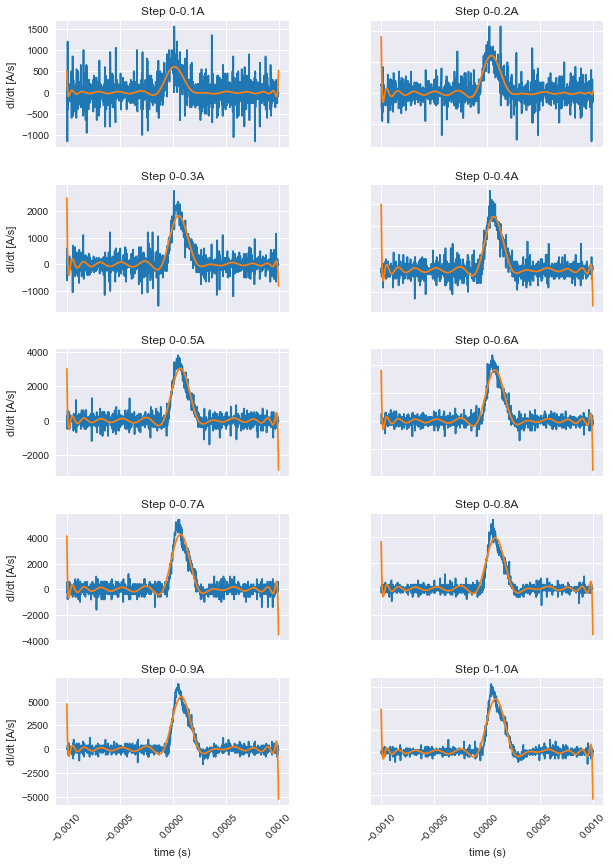

In [40]:
#Plotting raw derivative and poly fitting derivative together
fig, axs = plt.subplots(5, 2, sharex=True)

count = 1
while count < (len(_raw_deriv)):
    for i in range(0,5):
        for j in range(0,2):
            axs[i, j].plot(_x_axis, _raw_deriv[count-1],'tab:blue')
            axs[i, j].plot(_x_axis, lista_de_dfs[count-1]['dI/dt'], 'tab:orange')
            axs[i, j].set_title('Step 0-'+str(count/10)+'A')
            count += 1
            
for ax in axs.flat:
    ax.set(xlabel='time (s)', ylabel='dI/dt [A/s]')
    ax.tick_params(axis='x', labelrotation=45)
    ax.grid('on')#, alpha=0.3)
    #ax.ticklabel_format(axis='x', style='sci', scilimits=(-1e-3,1e-3))
for ax in axs.flat:
    ax.label_outer()

plt.subplots_adjust(top=2.0, bottom=0.02, left=0.05, right=1.00, hspace=0.3,
                    wspace=0.35)

In [41]:
#Finding inflection point and first positives derivatives values
#Arrays used
_inflex_pts = []
_first_positives = []
_val_max = np.array([])

for i in lista_de_dfs:
    _inflex_pts.append(i.loc[i['dI/dt'].idxmax()][3])
    _box, j = 0, 0
    while i['dI/dt'][j] > _box:
        j+=1
    _box = i['dI/dt'][j]
    _first_positives.append(list(i.loc[i['dI/dt'] == _box].values)[0][3])
    
    #Fiding the maximum current for each step, and then calculating 63%:
    _val_max = np.append(_val_max,i.loc[i['I(A)'].idxmax()][0])
_I_tau_arr = _val_max*0.63    

In [42]:
_didt_pos = np.array([])
_t_arr = np.array([])
_t0_arr = np.array([])
_R_arr = np.array([])

for i in range(len(lista_de_dfs)):
#     if i == 0:
#         _box, j = 0, 0
#         while lista_de_dfs[i]['dI/dt'][j] < _box:
#             j+=1
#         _box = lista_de_dfs[i]['dI/dt'][j]
#         _didt_pos = np.append(_didt_pos,_box)
#     else:
#         _box, j = -0.1,0
#         while lista_de_dfs[i]['dI/dt'][j] > _box:

    #Fiding initial time t0 where dI/Dt are positive:
#     _t0_arr = np.append(_t0_arr,list(lista_de_dfs[i].loc[lista_de_dfs[i]['dI/dt'] == _didt_pos[i]].iloc[:1].values)[0][3])
#     _t0_arr = np.append(_t0_arr,list(lista_de_dfs[i].loc[lista_de_dfs[i]['I(A)'] > 0].iloc[:1].values)[0][3])
    _t0_arr = np.append(_t0_arr,list(lista_de_dfs[i].loc[lista_de_dfs[i]['I(A)'] > 0].iloc[:1].values)[0][3])
    
    #Fiding final time t of the 63% of current:
    _t_arr = np.append(_t_arr,list(lista_de_dfs[i].loc[lista_de_dfs[i]['I(A)'] >= _I_tau_arr[i]].iloc[:1].values)[0][3])
    
    #Collect R values in the 63% of the current:
    _R_arr = np.append(_R_arr,list(lista_de_dfs[i].loc[lista_de_dfs[i]['I(A)'] >= _I_tau_arr[i]].iloc[:1].values)[0][1])

In [43]:
lista_de_dfs[2].loc[lista_de_dfs[2]['I(A)'] > 0.033].iloc[:5]#.values[0][3]

I(A)     R(ohm)        dI/dt   time(s)
398  0.035685  99.584137  1349.854721 -0.000005
399  0.039579  94.990852  1384.629604 -0.000003
400  0.043348  90.789343  1418.469997 -0.000000
401  0.047494  85.621892  1451.314130  0.000003
402  0.051639  83.899415  1483.102043  0.000005

In [44]:
print(_val_max)
print(_I_tau_arr)
print(_t_arr)
print(_t0_arr)
print(_R_arr)

[0.10515688 0.21470462 0.32236793 0.43041426 0.54022896 0.64724843
 0.75429586 0.86484862 0.97543279 1.08545164]
[0.06624884 0.13526391 0.2030918  0.27116098 0.34034424 0.40776651
 0.47520639 0.54485463 0.61452266 0.68383453]
[4.750e-05 7.000e-05 8.250e-05 9.000e-05 9.750e-05 1.000e-04 9.750e-05
 1.025e-04 1.050e-04 1.050e-04]
[-6.50e-05 -4.75e-05 -4.00e-05 -3.75e-05 -3.75e-05 -3.25e-05 -2.75e-05
 -2.50e-05 -2.25e-05 -2.25e-05]
[18.49541638 23.3323603  24.64714357 24.81556779 24.73510586 24.48149629
 24.4014598  23.46016092 23.1835798  23.00853536]


In [45]:
#Average resistance for comparison
_R_avg = np.array([])
for i in range(len(lista_de_dfs)):
    _R_avg = np.append(_R_avg,lista_de_dfs[i]['R(ohm)'].iloc[500:])
# print(_R_avg.mean())
# print(_R_avg.std())

In [46]:
# Calculating Delta time (dt) for all steps
_dt = _t_arr - _t0_arr

#Finally, the Inductance for each step in Time Constant (1τ)
_L_arr = np.array([])
for i in range(len(lista_de_dfs)):
    _L_arr = np.append(_L_arr, _dt[i]*_R_arr[i])
    #_L_arr = np.append(_L_arr, _dt[i]*_R_avg.mean())  #don't use
_L_arr

array([0.00208073, 0.00274155, 0.00301928, 0.00316398, 0.00333924,
       0.0032438 , 0.00305018, 0.00299117, 0.00295591, 0.00293359])

### Plotting Inductance [L] versus Current [A]

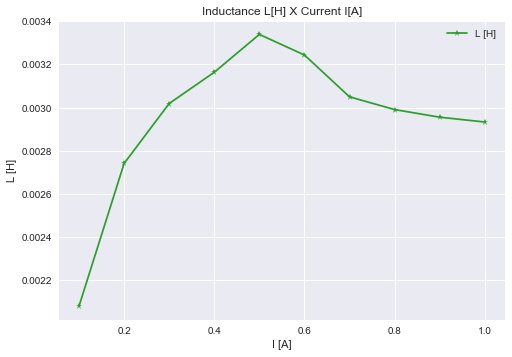

In [47]:
color = 'tab:green'
plt.plot(np.arange(0.1,1.1,0.1),_L_arr, '*-', color=color, label='L [H]')
plt.xlabel('I [A]')
plt.ylabel('L [H]')
plt.title('Inductance L[H] X Current I[A]')
plt.legend(loc='best')
plt.grid('on')#, alpha=0.3)

#### Average value for inductance L [H]:

In [48]:
#Avearage Inductance
_L_mean = _L_arr.mean()
_L_mean

## Visualization data with Plotly

In [49]:
import plotly.express as px
import plotly.graph_objects as go

In [50]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=lista_de_dfs[0]['time(s)'], y=lista_de_dfs[0]['I(A)'], name="I [A]"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=lista_de_dfs[0]['time(s)'], y=lista_de_dfs[0]['dI/dt'], name="dI/dt [A/s]"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="<b>dI/dt(A/s) versus I(A) on Step 0-1A</b>"
)

# Set x-axis title
fig.update_xaxes(title_text="time (s)")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> I[A]", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> dI/dt [A/s]", secondary_y=True, showgrid=False)

fig.show()



In [51]:

#Muliple Y-Axes Subplots
from plotly.subplots import make_subplots

fig = make_subplots(rows=5, cols=2,subplot_titles=("Step 0-0.1A", "Step 0-0.2A", "Step 0-0.3A", "Step 0-0.4A", "Step 0-5A",
                                                   "Step 0-0.6A", "Step 0-0.7A", "Step 0-0.8A", "Step 0-0.9A", "Step 0-1A"),
                    specs=[[{"secondary_y": True}, {"secondary_y": True}],
                           [{"secondary_y": True}, {"secondary_y": True}],
                           [{"secondary_y": True}, {"secondary_y": True}],
                           [{"secondary_y": True}, {"secondary_y": True}],
                           [{"secondary_y": True}, {"secondary_y": True}]
                          ])
_c = 1
while _c < (len(lista_de_dfs)):
    for i in range(1,6):
        for j in range(1,3):
            fig.add_trace(
                go.Scatter(x=lista_de_dfs[_c-1]['time(s)'], y=lista_de_dfs[_c-1]['I(A)'], name="0-"+str((_c)/10)+"A I[A]"),
                row=i, col=j, secondary_y=False)

            fig.add_trace(
                go.Scatter(x=lista_de_dfs[_c-1]['time(s)'], y=lista_de_dfs[_c-1]['dI/dt'], name="0-"+str((_c)/10)+"[A/s]"),
                row=i, col=j, secondary_y=True,
            )
            _c += 1

# Update xaxis properties
for i in range(1,6):      #n row
    for j in range(1,3):  #n column
        fig.update_xaxes(title_text="time (s)", row=i, col=j)
        # Update yaxis properties
        fig.update_yaxes(title_text="I [A]",secondary_y=False, row=i, col=j)
        fig.update_yaxes(title_text="dI/dt [A/s]",secondary_y=True, showgrid=False, row=i, col=j)

# Update title and height
fig.update_layout(title_text="<b>dI/dt [A/s] versus I [A] all Steps</b>", height=1500)

fig.show()

In [52]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0.1,1.1,0.1), y=_L_arr,
             mode='lines',
             name='L(H)'))
# fig.update_layout(title='Inductance as a function of time',
#                   yaxis_zeroline=False, xaxis_zeroline=False)
fig.update_layout(
    title=go.layout.Title(
        text="<b>Inductance as a function of current (L[H] x I[A])</b>",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="I[A]"
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="L(H)"
        )
    )
)

fig.show()

In [53]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on / off the source code"></form>''')